In [171]:
import pandas as pd 
import numpy as np 

In [172]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [174]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [175]:
df.duplicated().sum()

0

In [176]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [177]:
# remove Columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [178]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [179]:
df= pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.astype(int)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [180]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Exited']),df['Exited'],random_state=42,test_size=0.2)

In [181]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,True,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,True,True
6087,561,27,9,135637.00,1,1,0,153080.40,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,False,False,False
5390,735,38,1,0.00,3,0,0,92220.12,False,False,False
860,667,43,8,190227.46,1,1,0,97508.04,False,False,True


In [182]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [183]:
import tensorflow
from tensorflow import keras
from tensorflow.keras  import Sequential
from tensorflow.keras.layers import Dense

In [184]:
model=Sequential()
model.add(Dense(3,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [185]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [188]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [198]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.3522 - val_accuracy: 0.8537 - val_loss: 0.3442
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.3425 - val_accuracy: 0.8550 - val_loss: 0.3442
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.3577 - val_accuracy: 0.8556 - val_loss: 0.3443
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.3366 - val_accuracy: 0.8575 - val_loss: 0.3445
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3484 - val_accuracy: 0.8562 - val_loss: 0.3442
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.3535 - val_accuracy: 0.8594 - val_loss: 0.3452
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3416 - val_accuracy: 0.8544 - val_loss: 0.3442
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3439 - val_accu

In [199]:
model.layers[0].get_weights()

[array([[ 0.00469663,  0.02825318,  0.08951841],
        [ 0.13414429, -0.37439558, -1.3191857 ],
        [ 0.08329228, -0.0117875 , -0.09168807],
        [-0.41639635, -0.58902144, -0.05373098],
        [-1.1573584 , -2.296238  , -0.62242514],
        [ 0.0926375 ,  0.03333766, -0.07762039],
        [ 0.65014607, -0.21876065, -0.6688585 ],
        [ 0.01278383,  0.03449078,  0.02066141],
        [ 0.03040432,  0.35499036,  0.07188883],
        [ 0.01271013, -0.04805451, -0.09251906],
        [ 0.19757712,  0.11153001,  0.0630799 ]], dtype=float32),
 array([2.8561292, 1.3166249, 1.6887847], dtype=float32)]

In [200]:
y_log=model.predict(x_test_scaled)
y_pred=np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [201]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

86.25

In [203]:
history.history

{'accuracy': [0.8596875071525574,
  0.8598437309265137,
  0.8606250286102295,
  0.8570312261581421,
  0.8603125214576721,
  0.8587499856948853,
  0.8590624928474426,
  0.8615624904632568,
  0.859375,
  0.8600000143051147,
  0.8581249713897705,
  0.8596875071525574,
  0.8587499856948853,
  0.8603125214576721,
  0.8573437333106995,
  0.8607812523841858,
  0.8581249713897705,
  0.859375,
  0.860156238079071,
  0.8584374785423279,
  0.8582812547683716,
  0.8592187762260437,
  0.8579687476158142,
  0.858593761920929,
  0.859375,
  0.859375,
  0.8571875095367432,
  0.859375,
  0.8600000143051147,
  0.8587499856948853,
  0.860156238079071,
  0.8600000143051147,
  0.8604687452316284,
  0.8589062690734863,
  0.859375,
  0.8579687476158142,
  0.8596875071525574,
  0.8603125214576721,
  0.8581249713897705,
  0.8587499856948853,
  0.8603125214576721,
  0.8603125214576721,
  0.860156238079071,
  0.8589062690734863,
  0.8600000143051147,
  0.8603125214576721,
  0.8589062690734863,
  0.86078125238418

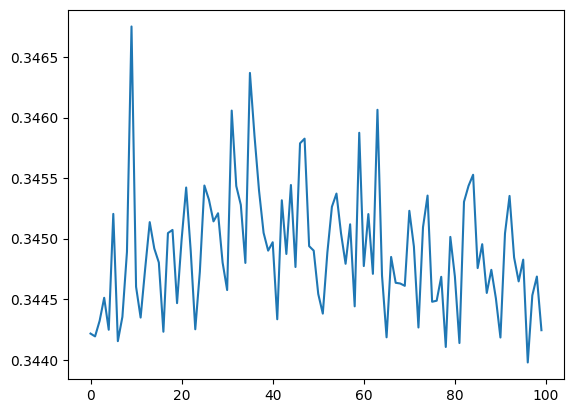

In [207]:
import matplotlib.pyplot as plt 
plt.plot(history.history['val_loss'])


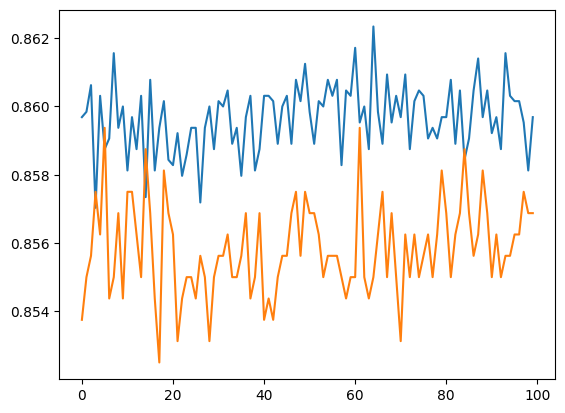

In [209]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()